# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

Project Summary :

In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

<a id="1"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Importing the Libraries</p>

In [132]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Loading the Dataset</p>

 We have loaded the dataset. It consists of 2240 observations and 29 attributes.

In [133]:
#Loading the dataset
data = pd.read_csv("/Users/tejaldeshmukh/Documents/Coursework Spring 2023/Capstone Project/marketing_campaign.csv", sep="\t")
print("Number of observations:", (data.shape))
data.head()

Number of observations: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [134]:
#Printing the column names/attributes in the dataset
print("Columns in Dataset are :\n \n", data.columns)

Columns in Dataset are :
 
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


<a id="3"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Cleaning the Dataset</p>

In [135]:
#Information on features in the dataset
data.info()
# Checking for nulls in the dataset
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [136]:
#To drop the rows with Null values in the attribute 'Income'
data = data.dropna()
print("Total number of observations after dropping the rows with missing values are:", len(data))

Total number of observations after dropping the rows with missing values are: 2216


In [137]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
#data['Income']=data['Income'].fillna(data['Income'].median())

In [138]:
#Checking if any Null value is present in any of the features
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [139]:
#Renaming columns for better readability and understanding
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [140]:
#Printing the column names/attributes in the dataset
print("Columns in Dataset are :\n \n", data.columns)

Columns in Dataset are :
 
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


<a id="4"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Feature Engineering</p>

In [141]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [142]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [143]:
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [144]:
#Checking the count for every category present in the feature "Education"
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [145]:
#Segmenting the education levels in three distinct groups of "Undergraduate", "Graduate" and "Postgraduate"
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

<Figure size 576x576 with 0 Axes>

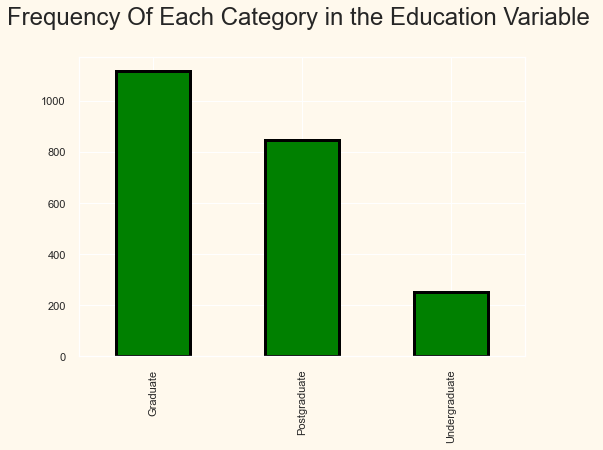

<Figure size 576x576 with 0 Axes>

In [171]:
#Vizualizing the New Feature "Education"
data["Education"].value_counts().plot(kind='bar',color = 'Green',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

In [147]:
#Checking the count for every category present in the feature "Marital_Status"
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [148]:
#Segmenting the marital status categories into disntinct groups of "Partner" and "Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

<Figure size 576x576 with 0 Axes>

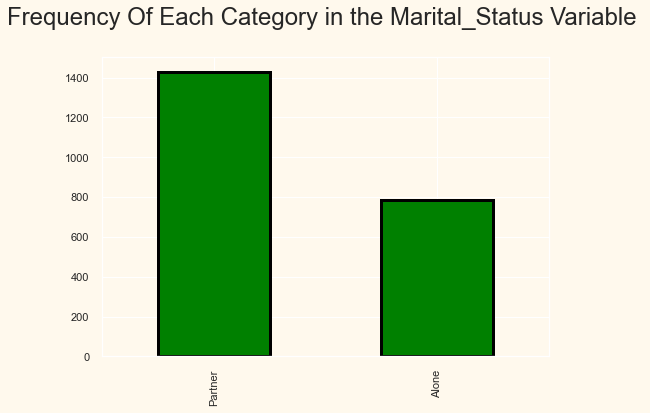

<Figure size 576x576 with 0 Axes>

In [149]:
#Vizualizing the New Feature "Marital_Status"
data["Living_With"].value_counts().plot(kind='bar',color = 'Green',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

In [150]:
#Maximum Income
data['Income'].max()

666666.0

In [151]:
#Minimum Income
data['Income'].min()

1730.0

In [152]:
#AverageIncome
data['Income'].mean()

52247.25135379061

In [153]:
#Creating feature for total children living in the household by combining features "Kidhome" and "Teenhome"
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [154]:
#Checking the count for every category present in the feature "Marital_Status
#print("Total categories present in the feature Kids:",data["Children"].value_counts())
#print("\n")

In [155]:
#VISUALIZING THE "Kids"
#data["Children"].value_counts().plot(kind='bar',color = 'Green',edgecolor = "black",linewidth = 3)
#plt.title("Frequency Of Each Category in the Children Variable \n",fontsize=24)
#plt.figure(figsize=(8,8))

In [ ]:
#Creating feature for total children living in the household by combining features "Kidhome" and "Teenhome"
#df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] 
#                        + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [157]:
#Total spendings on various items
data["Spent"] = data["Wines"]+ data["Fruits"]+ data["Meat"]+ data["Fish"]+ data["Sweets"]+ data["Gold"]


In [158]:
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

In [159]:
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [160]:
#Dropping some of the redundant features which are not going to contribute to the model building
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [161]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Children,Spent,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,0.947202,607.075361,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,0.749062,602.900476,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,0.000000,5.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,0.000000,69.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,1.000000,396.500000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1.000000,1048.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,3.000000,2525.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

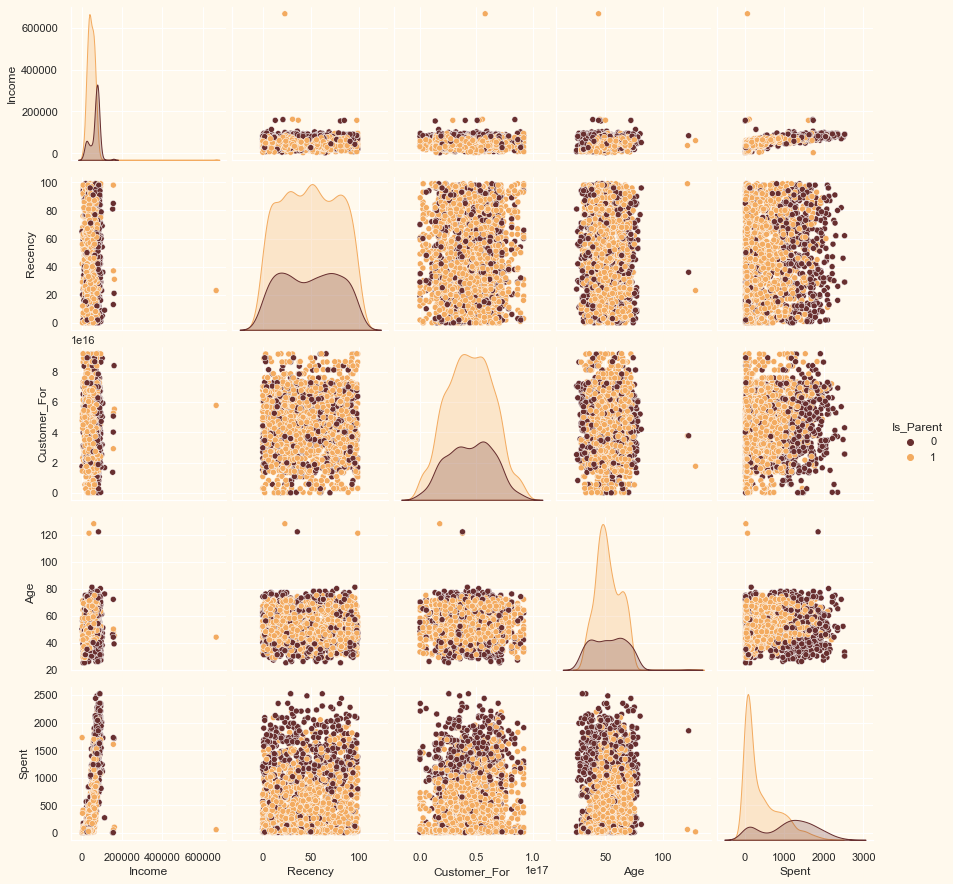

In [162]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [164]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("Total number of observations after removing the outliers are :", len(data))

Total number of observations after removing the outliers are : 2212


<AxesSubplot:>

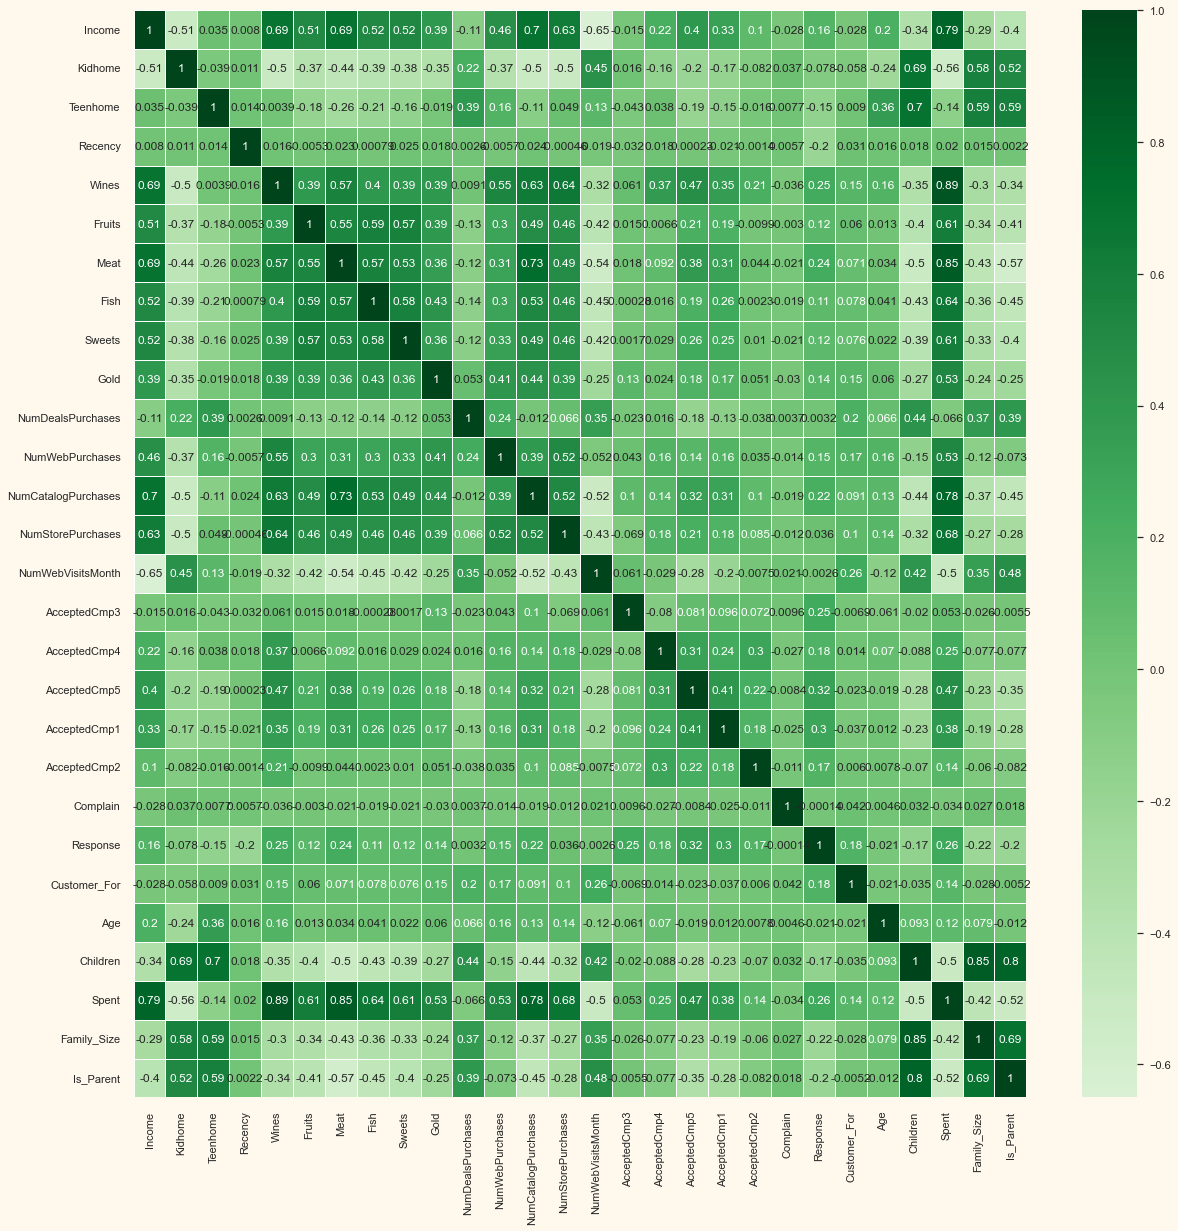

In [168]:
#Finding the correlation between the features in the dataset using the correlation matrix
corrmatrix= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmatrix,annot=True, cmap="Greens", center=0,linewidths=1)

<a id="5"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Preprocessing Data</p>

In [172]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset are:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [180]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("Categorical features are converted to numerical features.")

Categorical features are converted to numerical features.


In [179]:
#Creating a copy of the original dataframe "data"
ds = data.copy()
# creating a subset of dataframe which has features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
# Dropping features related to deals accepted and promotions since we have now created a separate dataframe for those features
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("We have scaled all the features.")

We have scaled all the features.


In [181]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Living_With,Children,Spent,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,-1.349603,-1.264598,1.676245,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-1.349603,1.404572,-0.963297,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.740959,-1.264598,0.280110,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,0.740959,0.069987,-0.920135,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,0.740959,0.069987,-0.307562,0.449070,0.632456


<a id="6"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Dimensionality Reduction - PCA </p>

In [182]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-6.906270e-17,2.878377,-5.969395,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,4.316419e-18,1.706839,-4.312210,-1.328312,-0.158114,1.242291,6.142717
col3,2212.0,1.801854e-17,1.221956,-3.530189,-0.828787,-0.022233,0.799597,6.611869


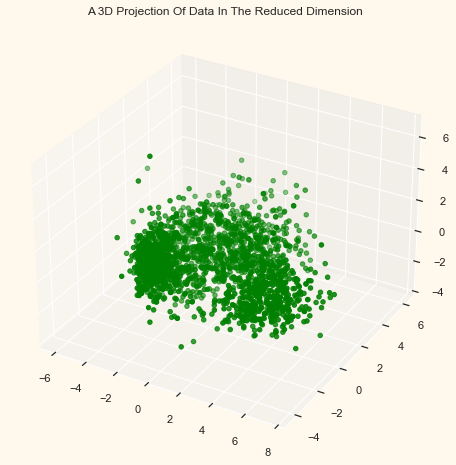

In [184]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<a id="7"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Clustering the Data </p>

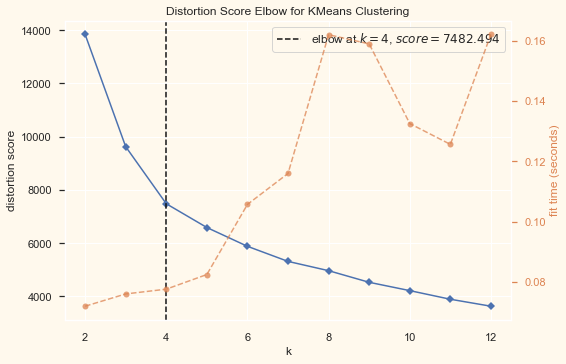

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [187]:
# Using the elbow method to find the optimal number of clusters
model = KMeans()
Elbow_M = KElbowVisualizer(model, k=12)
Elbow_M.fit(PCA_ds)    # Fit the data to the visualizer
Elbow_M.show()         # Finalize and render the figure



In [189]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

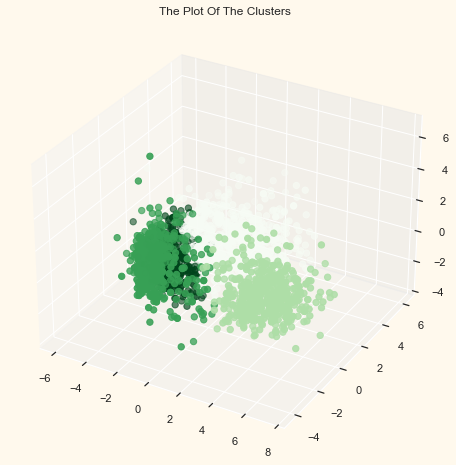

In [190]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = "Greens" )
ax.set_title("The Plot Of The Clusters")
plt.show()

<a id="8"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Model Evaluation</p>

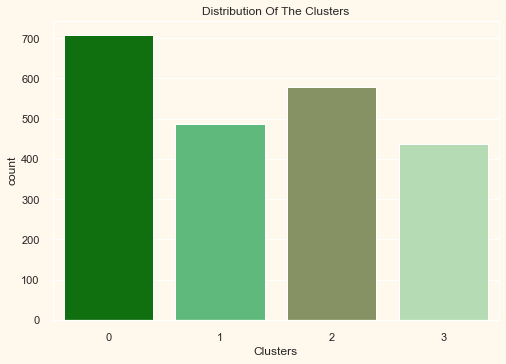

In [195]:
#Plotting countplot of clusters
pal = ["#008000","#50C878","#8A9A5B","#AFE1AF"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

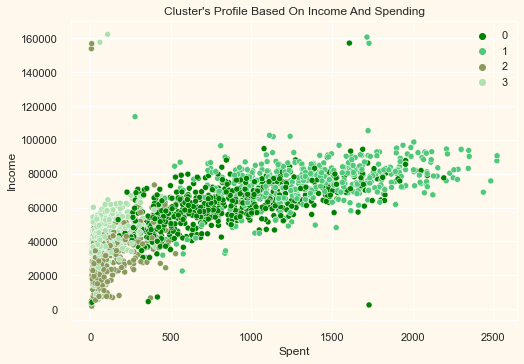

In [196]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

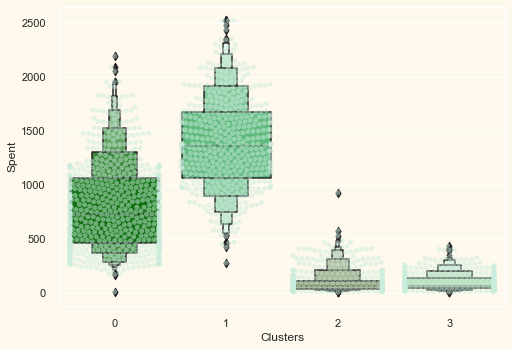

In [197]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

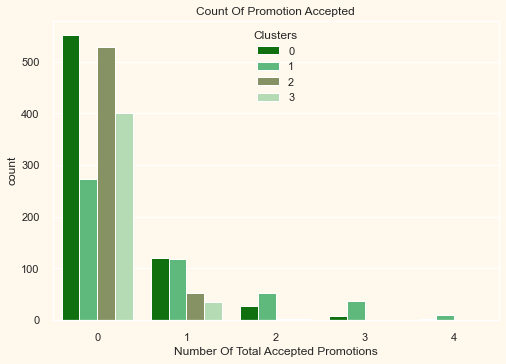

In [198]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

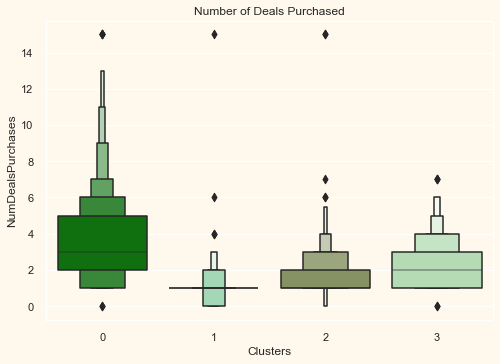

In [199]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 576x396 with 0 Axes>

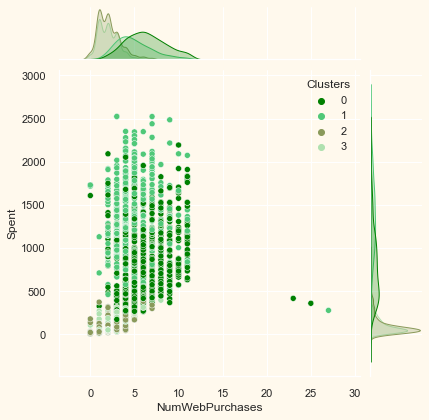

<Figure size 576x396 with 0 Axes>

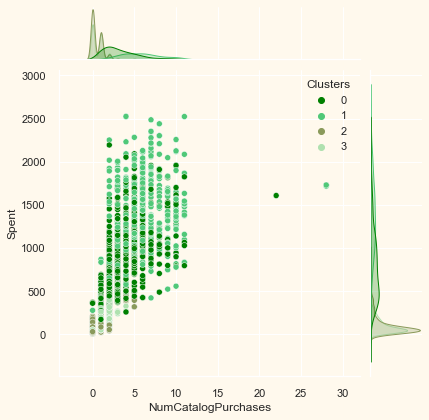

<Figure size 576x396 with 0 Axes>

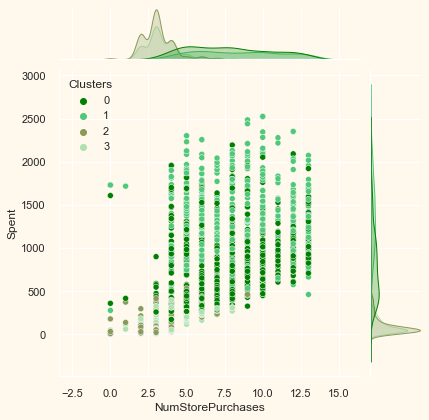

<Figure size 576x396 with 0 Axes>

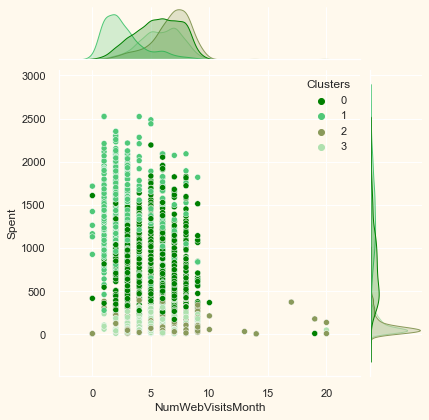

In [200]:
#for more details on the purchasing style 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

<a id="9"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">Profiling</p>

<Figure size 576x396 with 0 Axes>

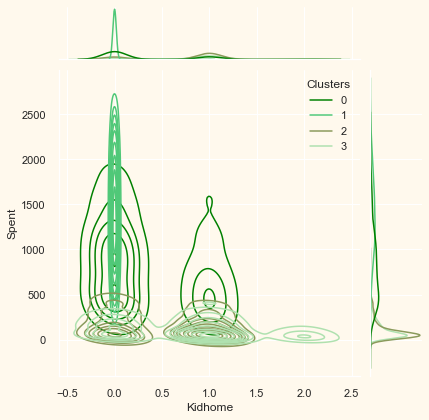

<Figure size 576x396 with 0 Axes>

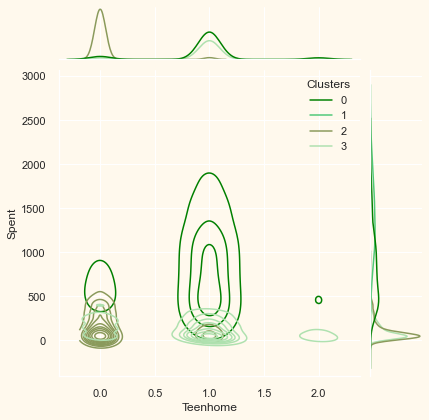

<Figure size 576x396 with 0 Axes>

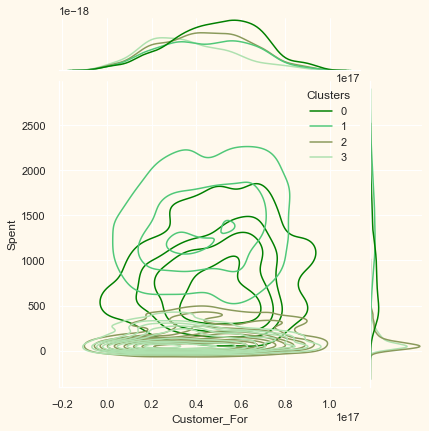

<Figure size 576x396 with 0 Axes>

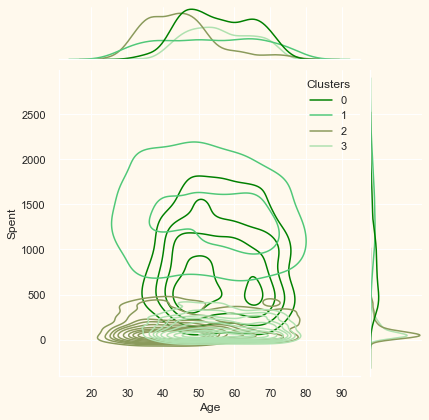

<Figure size 576x396 with 0 Axes>

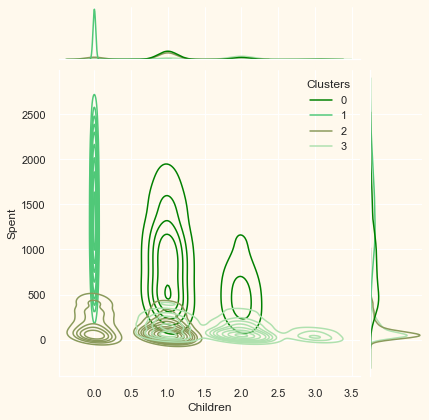

<Figure size 576x396 with 0 Axes>

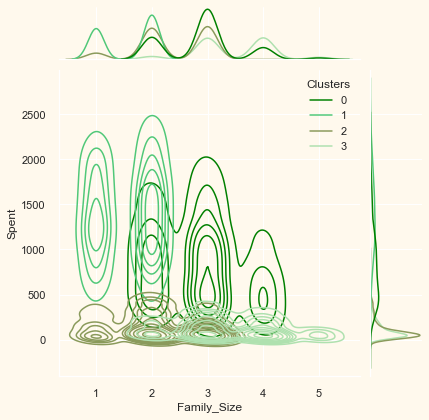

<Figure size 576x396 with 0 Axes>

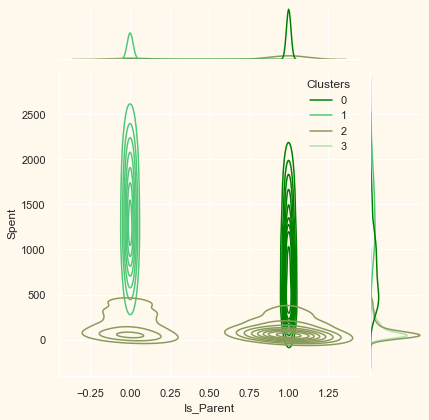

<Figure size 576x396 with 0 Axes>

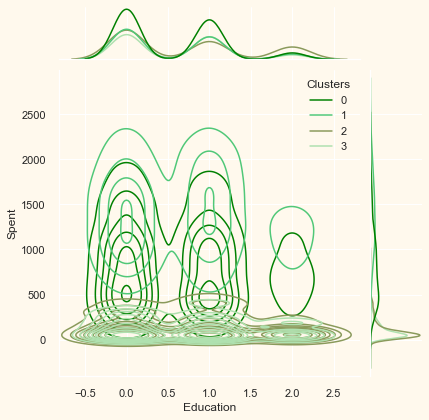

<Figure size 576x396 with 0 Axes>

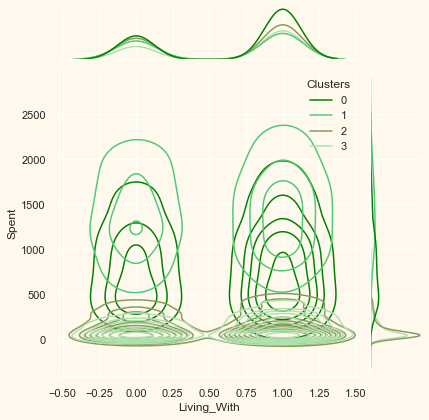

In [201]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()


<a id="10"></a>
# <p style="background-color:#506f08;font-family:newtimeroman;color:#Ffffff;font-size:100%;text-align:center;border-radius:15px 15px;">End</p>